# Tugas Graph Mining
Kelompok 6

- 13515052 - Kevin Jonathan Koswara
- 13515109 - Harum Lokawati
- 13516036 - Ilma Alifia Mahardika

## Import library

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np
from matplotlib import colors

## Read data

In [2]:
data = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

### Graph info

In [25]:
print(nx.info(data))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [20]:
layout = nx.spring_layout(data)

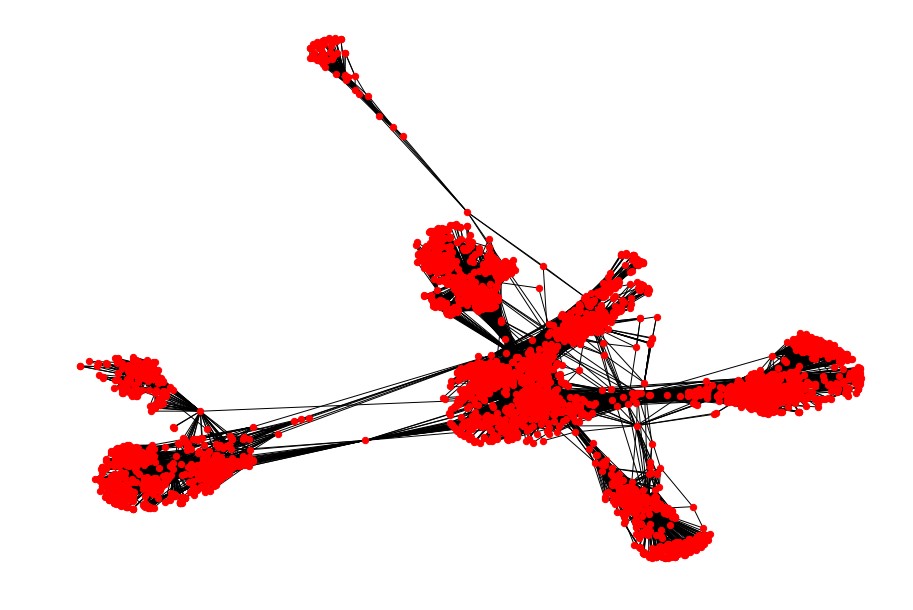

In [23]:
plt.figure(figsize=(12, 8))
nx.draw(data, pos=layout, with_labels = False, node_size = 40)

## Community detection

Komunitas(community) dalam social network adalah kumpulan orang yang memiliki kedekatan satu sama lain. Dalam kasus facebook, komunitas yang ingin dicari adalah kumpulan orang yang memiliki banyak pertemanan satu sama lain.

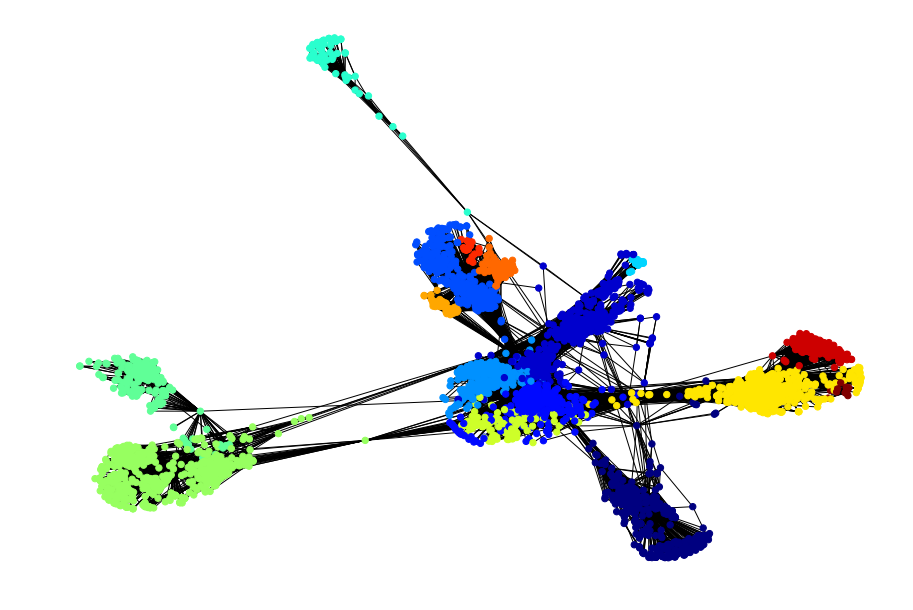

In [22]:
plt.figure(figsize=(12, 8))
parts = community.best_partition(data)
values = [parts[node] for node in data.nodes()]
nx.draw(data, pos=layout, cmap = plt.get_cmap("jet"), node_color = values, node_size = 40, with_labels = False)

### Community size

In [26]:
def get_communities(parts):
    res = {}
    for node in parts:
        if (parts[node] not in res):
            res[parts[node]] = [node]
        else:
            res[parts[node]].append(node)
    return res

comm = get_communities(parts)
comm_size = {}
for c in comm:
    comm_size[c] = len(comm[c])
comm_size

{0: 350,
 1: 431,
 2: 435,
 3: 423,
 4: 323,
 5: 25,
 6: 60,
 7: 206,
 8: 548,
 9: 129,
 10: 535,
 11: 73,
 12: 237,
 13: 19,
 14: 226,
 15: 19}

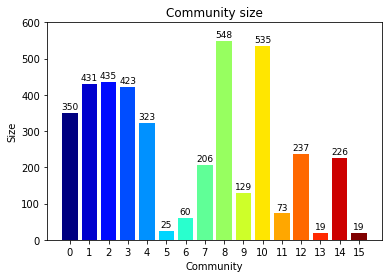

In [55]:
norm = colors.Normalize(vmin=0.0, vmax=float(len(comm_size)-1))
cmap = plt.get_cmap('jet')

rgba = cmap(norm(0.0))
for item in comm_size:
    plt.bar(item, comm_size[item], color = cmap(norm(float(item))))
    if (comm_size[item] > 100):
        plt.text(item - 0.45, comm_size[item] + 10, str(comm_size[item]), fontsize=9)
    elif (comm_size[item] > 10):
        plt.text(item - 0.3, comm_size[item] + 10, str(comm_size[item]), fontsize=9)
plt.ylim(0, 600)
plt.xticks(np.arange(0, len(comm_size)))
plt.title("Community size")
plt.xlabel("Community")
plt.ylabel("Size")
plt.show()

In [28]:
np.max(comm_size.values())

548

In [29]:
np.min(comm_size.values())

19